In [185]:
#OS
# import io
# from google.colab import files
# import multiprocessing

#Basic
import numpy as np
import pandas as pd

#NLP
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec

#Text
from string import punctuation
from string import digits
import re

#Vis
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
# from colour import Color
import seaborn as sns
import matplotlib.pyplot as plt

#ML
from sklearn.feature_extraction.text import CountVectorizer
import textstat

#Memory
import multiprocessing

# import statsmodels.formula.api as sm
# import scipy.optimize
# import scipy
# import scipy.stats

## Understanding Data

In [3]:
amazon_reviews = pd.read_csv('Reviews.csv')
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [129]:
print("Id unique count is", amazon_reviews_pre['Id'].nunique())
print("User Id unique count is",amazon_reviews_pre['UserId'].nunique())
print("Product Id unique count is",amazon_reviews_pre['ProductId'].nunique())

Id unique count is 568411
User Id unique count is 256047
Product Id unique count is 74258


## Data Cleaning

In [30]:
amazon_reviews_cleaned = amazon_reviews.copy()

In [5]:
#Handling NaNs
missing_values_count = amazon_reviews_cleaned.isnull().sum()
missing_valuess_prectange = (missing_values_count / len(amazon_reviews_cleaned) * 100).round(1)
missing_table = pd.concat([missing_values_count, missing_valuess_prectange], axis=1)
missing_table.columns = ["Missing Count", "Missing %"]
missing_table

,Missing Count,Missing %
Id,0,0.0
ProductId,0,0.0
UserId,0,0.0
ProfileName,16,0.0
HelpfulnessNumerator,0,0.0
HelpfulnessDenominator,0,0.0
Score,0,0.0
Time,0,0.0
Summary,27,0.0
Text,0,0.0


In [31]:
amazon_reviews_cleaned = amazon_reviews_cleaned.dropna(subset = ['ProfileName', 'Summary'])

missing_values_count = amazon_reviews_cleaned.isnull().sum()
missing_valuess_prectange = (missing_values_count / len(amazon_reviews_cleaned) * 100).round(1)
missing_table = pd.concat([missing_values_count, missing_valuess_prectange], axis=1)
missing_table.columns = ["Missing Count", "Missing %"]
missing_table

,Missing Count,Missing %
Id,0,0.0
ProductId,0,0.0
UserId,0,0.0
ProfileName,0,0.0
HelpfulnessNumerator,0,0.0
HelpfulnessDenominator,0,0.0
Score,0,0.0
Time,0,0.0
Summary,0,0.0
Text,0,0.0


In [32]:
#Text Cleaning
amazon_reviews_cleaned[['Cleaned_Summary','Cleaned_Text']] = amazon_reviews_cleaned[['Summary','Text']].astype(str)

def clean_text(df, text):

    for i in text:
        df[i] = df[i].astype(str)

        #Lower all characters
        df[i] = df[i].apply(lambda x: x.lower())
        print('Lowercases done!')

        #Remove punctuation
        df[i] = df[i].apply(lambda x: re.sub(r'[^\w\s]', ' ', str(x)))
        print('Removing punctuation done!')

        #Remove non-English characters
        df[i] = df[i].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
        df[i] = df[i].apply(lambda x: re.sub('\s+', ' ', str(x)))
        print('Filtering by English done!')

        #Remove URLs
        df[i] = df[i].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', ' ', str(x), flags=re.MULTILINE))
        print('Eliminating URLs done!')

        #Remove emojis
        emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  "]+", flags=re.UNICODE)
        df[i] = df[i].apply(lambda x: re.sub(emoji_pattern, ' ', str(x)))
        print('Emoji cleaning done!', '\n')

    print('All done!')

In [33]:
clean_text(amazon_reviews_cleaned,['Cleaned_Summary', 'Cleaned_Text'])

Lowercases done!
Removing punctuation done!
Filtering by English done!
Eliminating URLs done!
Emoji cleaning done! 

Lowercases done!
Removing punctuation done!
Filtering by English done!
Eliminating URLs done!
Emoji cleaning done! 

All done!


## Data Preprocessing

In [34]:
amazon_reviews_pre = amazon_reviews_cleaned.copy()

In [35]:
#List before tokenizing
summary_list = amazon_reviews_pre['Cleaned_Summary'].tolist()
text_list = amazon_reviews_pre['Cleaned_Text'].tolist()

#Tokenize
def tokenize(df, text):
      for i in text:
        df[i] = df[i].apply(lambda x: x.split(" "))

def strip(word):
    return word.strip

In [36]:
tokenize(amazon_reviews_pre,['Cleaned_Summary', 'Cleaned_Text'])

for i in amazon_reviews_pre[['Cleaned_Summary','Cleaned_Text']]:
    map(strip,  i)

In [37]:
amazon_reviews_pre['Cleaned_Summary'] = amazon_reviews_pre['Cleaned_Summary'].tolist()
amazon_reviews_pre['Cleaned_Text'] = amazon_reviews_pre['Cleaned_Text'].tolist()

In [35]:
#Test
amazon_reviews_pre[['Cleaned_Summary','Cleaned_Text']]

,Cleaned_Summary,Cleaned_Text
0,"[good, quality, dog, food]","[i, have, bought, several, of, the, vitality, ..."
1,"[not, as, advertised]","[product, arrived, labeled, as, jumbo, salted,..."
2,"[, delight, says, it, all]","[this, is, a, confection, that, has, been, aro..."
3,"[cough, medicine]","[if, you, are, looking, for, the, secret, ingr..."
4,"[great, taffy]","[great, taffy, at, a, great, price, there, was..."
...,...,...
568449,"[will, not, do, without]","[great, for, sesame, chicken, this, is, a, goo..."
568450,[disappointed],"[i, m, disappointed, with, the, flavor, the, c..."
568451,"[perfect, for, our, maltipoo]","[these, stars, are, small, so, you, can, give,..."
568452,"[favorite, training, and, reward, treat]","[these, are, the, best, treats, for, training,..."


In [38]:
#Remove stopwords
sw = set(stopwords.words('english'))
new_sw = ['br','href', 'gp', 'team', 'every', 'each', 'though', 'maybe', 'yet', 'bit', 'u', 'b', 'even', 'really']

amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Cleaned_Summary']]

amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in sw] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in new_sw] for sen in amazon_reviews_pre['Cleaned_Text']]

#Remove digits
dg = digits
amazon_reviews_pre['Cleaned_Summary'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Cleaned_Text'] = [[w for w in sen if w not in dg] for sen in amazon_reviews_pre['Cleaned_Text']]

In [39]:
# Lemmatize
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

stemmer = nltk.stem.WordNetLemmatizer()
amazon_reviews_pre['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.ADV) for w in sen] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.ADJ) for w in sen] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.VERB) for w in sen] for sen in amazon_reviews_pre['Cleaned_Summary']]
amazon_reviews_pre['Cleaned_Summary'] = [[stemmer.lemmatize(w, wn.NOUN) for w in sen] for sen in amazon_reviews_pre['Cleaned_Summary']]

In [40]:
amazon_reviews_pre['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.ADV) for w in sen] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.ADJ) for w in sen] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.VERB) for w in sen] for sen in amazon_reviews_pre['Cleaned_Text']]
amazon_reviews_pre['Cleaned_Text'] = [[stemmer.lemmatize(w, wn.NOUN) for w in sen] for sen in amazon_reviews_pre['Cleaned_Text']]

In [16]:
#Test
amazon_reviews_pre['Cleaned_Text']

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, centuries, light, pillowy...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chicken, good, well, resturant...
568450    [disappointed, flavor, chocolate, notes, espec...
568451    [stars, small, give, one, training, session, t...
568452    [best, treats, training, rewarding, dog, good,...
568453    [satisfied, product, advertised, use, cereal, ...
Name: Cleaned_Text, Length: 568411, dtype: object

In [41]:
#Save filtered columns
summary_text = amazon_reviews_pre['Cleaned_Summary']
review_text = amazon_reviews_pre['Cleaned_Text']

## Data Visualization

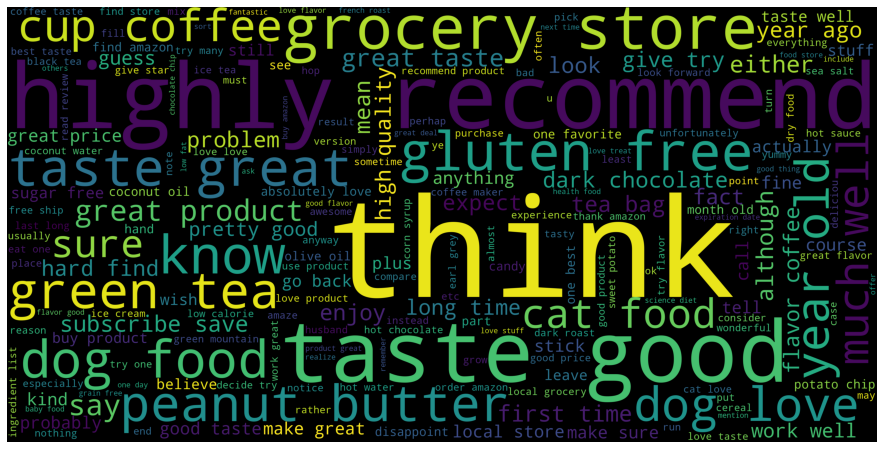

In [42]:
corpus = ' '.join(map(str, review_text))
corpus = corpus.replace("'", "")

# Create a wordcloud object
singles_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(corpus)
plt.figure(figsize=(20,8))
plt.imshow(singles_wordcloud)
plt.axis('off')
# Save the image and show it
# plt.savefig('commonwords.png')
plt.show()

Now let's check the distribution of reviews scores.

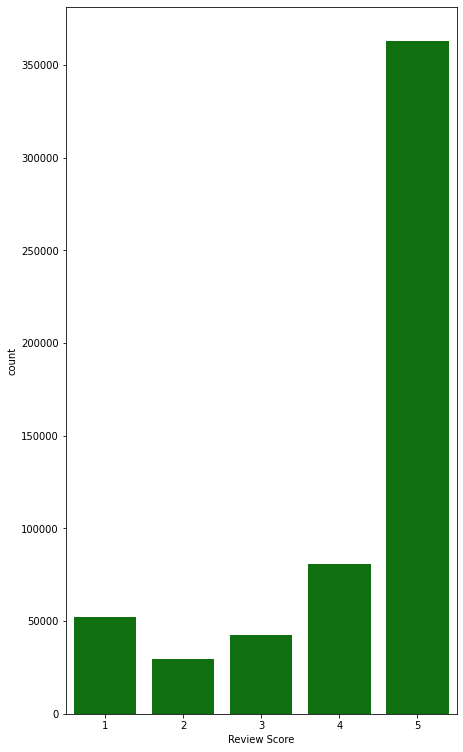

In [53]:
plt.subplots(figsize=(7,13))
sns.countplot(x='Score', data=amazon_reviews_pre, color='g')
plt.xlabel('Review Score')
plt.show()

Interesting... Now let's check if how many reviews each user wrote.

In [151]:
per_user = amazon_reviews_pre.groupby('UserId').agg({'Id': len})\
.rename(columns={'Id': 'reviews_per_user'})\
.sort_values(by='reviews_per_user',ascending=False)

per_user.head(20)

,reviews_per_user
UserId,
A3OXHLG6DIBRW8,448
A1YUL9PCJR3JTY,421
AY12DBB0U420B,389
A281NPSIMI1C2R,365
A1Z54EM24Y40LL,256
A1TMAVN4CEM8U8,204
A2MUGFV2TDQ47K,201
A3TVZM3ZIXG8YW,199
A3PJZ8TU8FDQ1K,178


Seems like some users wrote a lot of reviews! Some of them have reasonable reasons like *Rebecca of Amazon* as apparently she profits from trying products and reviewing them, but other users are a bit suspicious such as *c2*, so let's dig more into it.

In [216]:
per_user.reviews_per_user.values

array([448, 421, 389, ...,   1,   1,   1])

In [147]:
per_user.head()

,,reviews_per_user
UserId,ProfileName,
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",448
A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",421
AY12DBB0U420B,Gary Peterson,389
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",365
A1Z54EM24Y40LL,c2,256


Looks like it's the same issue... that indicates the high possibilty of fake reviews.

So, I'm going to check the reviews legnth.

## Feature Engineering

- `reviews_length`
- `reviews_per_user`
- `avg_word_length`
- `helpful %`

In [206]:
amazon_reviews_pre['reviews_length'].describe()

count    568411.000000
mean         39.129169
std          39.882966
min           0.000000
25%          16.000000
50%          27.000000
75%          47.000000
max        1934.000000
Name: reviews_length, dtype: float64

In [207]:
amazon_reviews_pre[amazon_reviews_pre['reviews_length'] == 0]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Summary,Cleaned_Text,reviews_length,reviews_count,complexity,avg_word_length,reviews_per_user
233938,233939,B003E6COMO,A2ZE58VIDDCMR7,inna,1,2,5,1350000000,&#1091;&#1076;&#1086;&#1073;&#1085;&#1072;&#11...,&#1056;&#1077;&#1096;&#1080;&#1083;&#1072; &#1...,[],[],0,0,NaN,0.0,1


This entry is clearly a fake review. Our goal now will be to build a business model to predict whether the user's review is fake or not.

In [208]:
amazon_reviews_pre['reviews_length']=amazon_reviews_pre['Cleaned_Text'].apply(len)

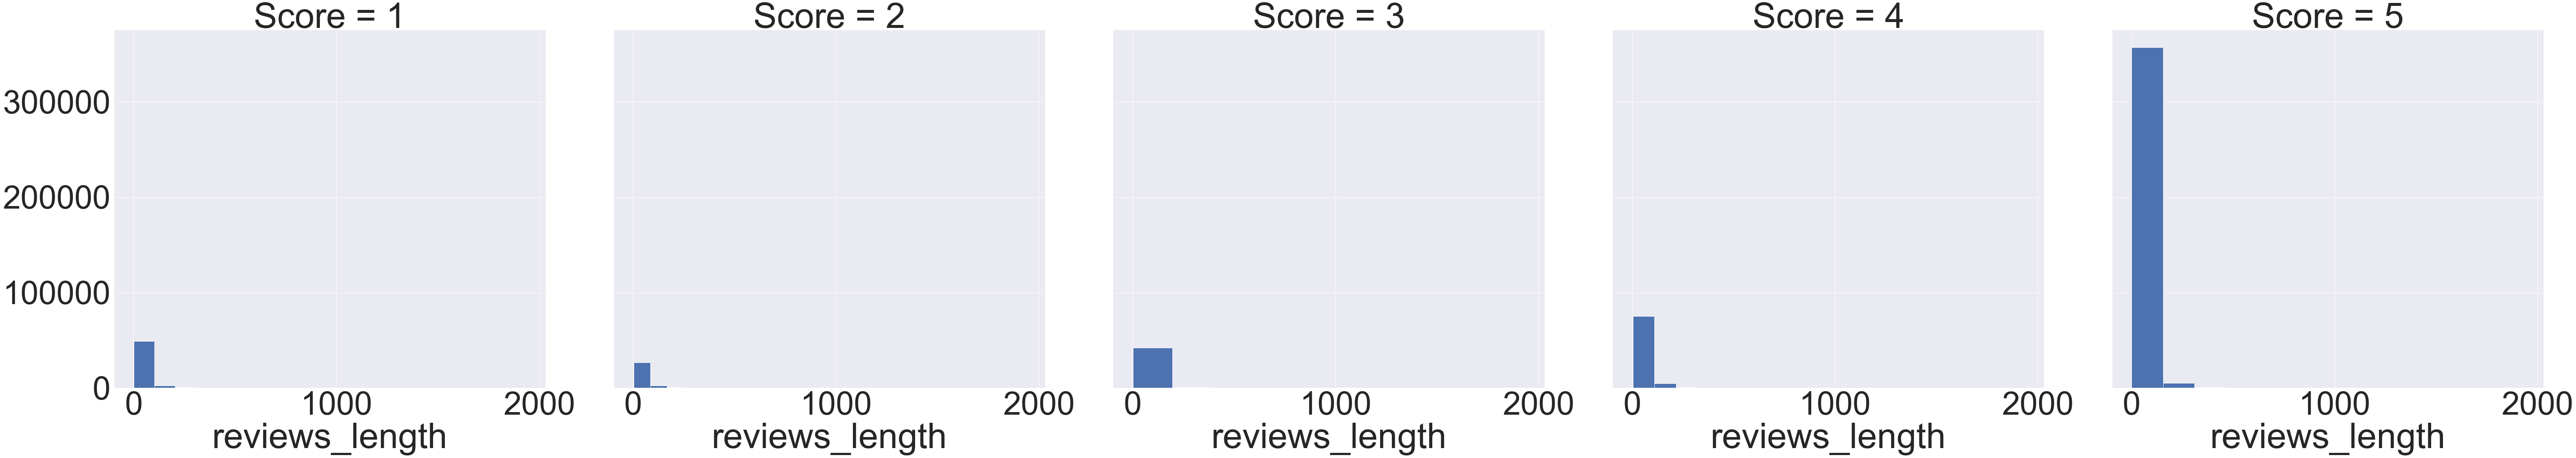

In [209]:
# sns.set(font_scale=8.0)
g = sns.FacetGrid(amazon_reviews_pre, col='Score', height=20)
g.map(plt.hist,'reviews_length');

In [210]:
amazon_reviews_pre['avg_word_length'] = amazon_reviews_pre["Cleaned_Text"].apply(lambda x: np.mean([len(w) for w in x]))
amazon_reviews_pre['avg_word_length'] = round(amazon_reviews_pre['avg_word_length'])
amazon_reviews_pre['avg_word_length'].value_counts()

/home/tima/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


0         5.434783
1         5.888889
2         5.775000
3         5.833333
4         5.461538
            ...   
568449    5.250000
568450    5.363636
568451    5.135135
568452    4.777778
568453    6.333333
Name: avg_word_length, Length: 568411, dtype: float64

In [213]:
amazon_reviews_pre['avg_word_length'].isnull().value_counts()

False    568410
True          1
Name: avg_word_length, dtype: int64

In [214]:
#Imputation
amazon_reviews_pre.loc[233938,['avg_word_length']] = 0
amazon_reviews_pre['avg_word_length'].isnull().value_counts()

False    568411
Name: avg_word_length, dtype: int64

Great! Moving on to the next feature..

In [226]:
per_user[per_user.index == i]['reviews_per_user']

UserId
A3OXHLG6DIBRW8    448
Name: reviews_per_user, dtype: int64

In [217]:
per_user.reviews_per_user[amazon_reviews_pre['UserId'][0]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [180]:
per_user.reviews_per_user['A3OXHLG6DIBRW8']

448

In [227]:
for i in amazon_reviews_pre['UserId']:
    amazon_reviews_pre['reviews_per_user'] = per_user[per_user.index == i]['reviews_per_user']

KeyboardInterrupt: 

In [205]:
amazon_reviews_pre['reviews_per_user']

1    568411
Name: reviews_per_user, dtype: int64

In [43]:
amazon_reviews_pre.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Summary,Cleaned_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[good, quality, dog, food]","[buy, several, vitality, can, dog, food, produ..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,[advertise],"[product, arrive, label, jumbo, salt, peanut, ..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[delight, say]","[confection, around, century, light, pillowy, ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[cough, medicine]","[look, secret, ingredient, robitussin, believe..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffy]","[great, taffy, great, price, wide, assortment,..."


In [228]:
### add some columns for upvote metrics
amazon_reviews_pre['helpful %'] = np.where(amazon_reviews_pre['HelpfulnessDenominator'] > 0, amazon_reviews_pre['HelpfulnessNumerator'] / amazon_reviews_pre['HelpfulnessDenominator'], -1)

amazon_reviews_pre['helpful %'].value_counts()

-1.000000    270039
 1.000000    183306
 0.000000     33774
 0.500000     21623
 0.666667     10513
              ...  
 0.876033         1
 0.893082         1
 0.179487         1
 0.924282         1
 0.265625         1
Name: helpful %, Length: 952, dtype: int64

## Data Modeling

### Topic Modeling

In [186]:
cores = multiprocessing.cpu_count() 

#Set the model
model = Word2Vec(review_text,
                 vector_size=50,
                 sg=0,
                 cbow_mean=0,
                 negative=10,
                 window=7,
                 max_vocab_size=None,
                 min_count=3,
                 workers=cores-1)
#Get training loss
model.get_latest_training_loss()

0.0

In [193]:
#Try out
model.wv.most_similar('fish', topn=15)

[('salmon', 0.9982723593711853),
 ('chicken', 0.9974296689033508),
 ('tuna', 0.9973222017288208),
 ('meat', 0.9969526529312134),
 ('can', 0.9967867136001587),
 ('food', 0.9966203570365906),
 ('also', 0.9964715242385864),
 ('cat', 0.996468722820282),
 ('product', 0.9964249730110168),
 ('since', 0.9964199066162109),
 ('shrimp', 0.9963957071304321),
 ('like', 0.9962970614433289),
 ('turkey', 0.9962949156761169),
 ('vegetable', 0.9962933659553528),
 ('especially', 0.9962456822395325)]

TensorFlow visualization for this model:

In [194]:
#Singles
vocab = np.array(model.wv.index_to_key)
vectors =  np.array(model.wv.vectors.tolist())

In [196]:
#Model tensorflow viz
savename = 'amazon_reviews'
with open( savename + '_tensors.tsv',  'w+', encoding='utf-8') as tensors:
    with open ( savename + '_metadata.tsv', 'w+') as metadata:
        for word in model.wv.index_to_key:
            encoded = word
            metadata.write(encoded + '\n')
            vector_row = '\t'.join(map(str, model.wv.get_vector(word)))
            tensors.write(vector_row + '\n')

Topic model is ready to be visualized at: [Tensorflow Embedding Projector](https://projector.tensorflow.org/)

## Review Helpfulness Score Prediction
